In [127]:
# Download Pancancer-normalized from Xena database:  

# # Example below with TCGA BRCA cohort
# !mkdir -p ./data
# !curl -o ./data/HiSeqV2_PANCAN_BRCA.gz https://tcga-xena-hub.s3.us-east-1.amazonaws.com/download/TCGA.BRCA.sampleMap%2FHiSeqV2_PANCAN.gz
# !gunzip ./data/HiSeqV2_PANCAN_BRCA.gz

# # # Download Hallmark genes 
# !curl -L -o ./data/hallmarks_signatures.csv https://raw.githubusercontent.com/mahmoodlab/SurvPath/main/datasets_csv/metadata/hallmarks_signatures.csv


In [1]:
import pandas as pd 
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read pan-cancer normalized RNA data from BRCA
# df_raw = pd.read_csv('data/HiSeqV2_PANCAN_BRCA', delimiter='\t')

# # Hallmark pathways
# hallmarks = pd.read_csv('data/hallmarks_signatures.csv').values.flatten()
# hallmarks = hallmarks[~pd.isnull(hallmarks)]
# hallmarks = pd.unique(hallmarks)

# Clean provided data
df_clean_own = pd.read_csv('data_csvs/rna/hallmarks/BRCA/rna_clean.csv', engine='python', index_col=0)
df_clean_raw = pd.read_csv('data_csvs/rna/hallmarks/BRCA/rna_clean_theirs.csv', engine='python', index_col=0)

In [3]:
print(df_clean_raw)

                 A2M    AAAS   AADAT    ABAT   ABCA1   ABCA2   ABCA3   ABCA4  \
TCGA-C8-A1HL  8.1511  4.7093  0.3115  4.3513  2.4934  3.8954  3.4920 -0.6873   
TCGA-EW-A2FS  7.5664  5.0206  1.5165  4.6657  1.7141  4.8595  3.5559  0.3685   
TCGA-A2-A3XX  7.4159  4.5104  3.1079  0.8883  0.4340  4.5760  3.9515 -0.8863   
TCGA-Z7-A8R5  9.3238  5.0126 -0.0877  2.1734  1.1960  4.5293  2.4518  0.9642   
TCGA-B6-A0RL  3.9543  5.4539  0.9419  4.7077  1.3225  5.4002  6.0957 -1.2481   
...              ...     ...     ...     ...     ...     ...     ...     ...   
TCGA-5T-A9QA  5.7320  5.4223  1.8918  2.6114  0.6239  4.6474  4.0850 -1.2142   
TCGA-AN-A0XT  7.8891  5.4483 -0.1993  2.2990  3.2328  3.0498  4.7115  1.5316   
TCGA-AO-A0J4  9.9420  4.4588  1.7828  1.0711  2.6533  3.9060  3.5299 -0.0425   
TCGA-A2-A0YK  8.7949  4.9737  1.2815  3.4674  3.4034  4.3198  3.5887  0.2881   
TCGA-A8-A09K  6.5156  4.8973 -0.8339  3.4384  1.9415  5.7562  5.5552 -3.8160   

               ABCA5   ABCA6  ...  ZNF2

In [29]:
df_clean = df_clean_raw.iloc[: , 1:]
df_clean = df_clean.reset_index(drop=True)
df_clean = df_clean.rename(columns={None: 'case_id'})
print(df_clean)

       RNF11     ATRX     PMM2     ASS1    NCBP1    RBM14    NCBP2      SPR  \
0    10.4259   9.7384  10.2038   8.9458   9.9498  10.7335  10.8880  10.5106   
1    10.7842   9.9302  11.1468   8.9060  10.0473  10.1364  10.5513  10.6441   
2    11.0071  10.5079  10.3365   9.6407   9.9018  10.4616  10.6503   9.8755   
3    10.8499  10.5833   9.9119   8.4208   9.9054  10.1024  11.0322   9.2715   
4    10.5895  10.2011   9.5771   9.3975   9.9325  10.6212  11.0715   9.6008   
..       ...      ...      ...      ...      ...      ...      ...      ...   
863  10.3775   8.5689  11.1238  10.1030   9.3839  10.1701  11.0840   9.1782   
864  10.8405  10.8174   9.7536  12.1206   9.9241   9.9625  10.5373   9.4378   
865  10.8106  10.7063  10.5723  10.7282   9.9207  10.1820  10.5780   8.4081   
866  10.8124   9.5770  10.4728  11.8393   9.1357  10.3841  10.4677  10.1489   
867  10.4298   9.7058  10.6568   8.5630  10.5152  10.9783  10.8806   9.3943   

     ZNF707   CAMK4  ...    LDHC     CFL1     NFIB 

In [3]:
df_clean = df_clean_raw.iloc[: , 1:]
# df_clean.index.names = 'case_id'
df_clean = df_clean.reset_index()

df_clean = df_clean.rename(columns={'index': 'case_id'})
print(df_clean)

     case_id    RNF11     ATRX     PMM2     ASS1    NCBP1    RBM14    NCBP2  \
0          0  10.4259   9.7384  10.2038   8.9458   9.9498  10.7335  10.8880   
1          1  10.7842   9.9302  11.1468   8.9060  10.0473  10.1364  10.5513   
2          2  11.0071  10.5079  10.3365   9.6407   9.9018  10.4616  10.6503   
3          3  10.8499  10.5833   9.9119   8.4208   9.9054  10.1024  11.0322   
4          4  10.5895  10.2011   9.5771   9.3975   9.9325  10.6212  11.0715   
..       ...      ...      ...      ...      ...      ...      ...      ...   
863      863  10.3775   8.5689  11.1238  10.1030   9.3839  10.1701  11.0840   
864      864  10.8405  10.8174   9.7536  12.1206   9.9241   9.9625  10.5373   
865      865  10.8106  10.7063  10.5723  10.7282   9.9207  10.1820  10.5780   
866      866  10.8124   9.5770  10.4728  11.8393   9.1357  10.3841  10.4677   
867      867  10.4298   9.7058  10.6568   8.5630  10.5152  10.9783  10.8806   

         SPR  ZNF707  ...    LDHC     CFL1     NFIB

In [3]:
folds = [0, 1, 2, 3, 4]
cases_from_folds  = []

for i in folds:
    df2 = pd.read_csv(f'splits/survival/TCGA_BRCA_overall_survival_k={i}/test.csv', delimiter=',')
    df3 = pd.read_csv(f'splits/survival/TCGA_BRCA_overall_survival_k={i}/train.csv', delimiter=',')

    cases_to_keep = list(df2[df2.columns[0]].values.flatten())
    cases_splits3 =list(df3[df3.columns[0]].values.flatten())
    cases_to_keep.extend(cases_splits3)
    print(len(cases_to_keep))
    cases_from_folds.append(set(cases_to_keep))

assert all(s == cases_from_folds[0] for s in cases_from_folds), "Not all sets are the same"

print("All sets in the list are identical.")


928
928
928
928
928
All sets in the list are identical.


In [4]:
print("Nr. of genes in gene sets: ", len(hallmarks))
print("Nr. of patients: ", len(cases_from_folds[0]))


Nr. of genes in gene sets:  4241
Nr. of patients:  868


In [6]:
df_raw_T = df_raw
df_raw_T = df_raw_T.set_index('sample')
df_raw_T = df_raw_T.transpose()
df_raw_T = df_raw_T.sort_index(axis=0)
df_raw_T = df_raw_T.reset_index()

In [5]:
# filter out and transpose
df_raw_filt = df_raw[df_raw['sample'].isin(hallmarks)].reset_index(drop=True)
# print(df_raw_filt)
df_raw_filt = df_raw_filt.rename(columns={'sample': None})
df_raw_filt = df_raw_filt.set_index(None)
# print(df_raw_filt)
df_raw_filt = df_raw_filt.transpose()
# print(df_raw_filt)
df_raw_filt = df_raw_filt.sort_index(axis=0)
# # print(df_raw_filt)
df_raw_filt = df_raw_filt.reset_index()
# print(df_raw_filt)
df_raw_filt = df_raw_filt.rename(columns={'index': 'sample'})
# print(df_raw_filt)
# Drop the samples from the normal tissue
df_filtered = df_raw_filt[~df_raw_filt['sample'].str.endswith('-11')].reset_index(drop=True)

# Keep only the samples from the primary tissue
df_filtered['sample'] = df_filtered['sample'].str.replace(r'-01', '', regex=True)

# Keep only the samples from the splits files; samples used in training
df_filtered_complete = df_filtered[df_filtered['sample'].isin(cases_to_keep)].reset_index(drop=True)

In [7]:
num_rows_raw, num_cols_raw = df_raw.shape
num_rows_raw_T, num_cols_raw_T = df_raw_T.shape
num_rows_filt, num_cols_filt = df_filtered_complete.shape
num_rows_clean, num_cols_clean = df_clean.shape

# -1 to leave out the column displaying the samples
assert num_cols_raw_T - 1 == num_rows_raw
assert num_cols_raw - 1 == num_rows_raw_T

In [8]:
print(f"Number of samples raw: {num_rows_raw_T}")
print(f"Number of genes raw: {num_cols_raw_T - 1}")

print(f"Number of samples filtered: {num_rows_filt}")
print(f"Number of genes filtered: {num_cols_filt - 1}")

print(f"Number of samples clean: {num_rows_clean}")
print(f"Number of genes clean: {num_cols_clean - 1}")

Number of samples raw: 1218
Number of genes raw: 20530
Number of samples filtered: 868
Number of genes filtered: 4168
Number of samples clean: 939
Number of genes clean: 4241


In [136]:
df_clean_no_dupl = df_clean[df_clean['Unnamed: 0'].isin(cases_to_keep)].reset_index(drop=True)
df_clean_no_dupl = df_clean_no_dupl[~df_clean_no_dupl['Unnamed: 0'].duplicated()].reset_index(drop=True)
df_clean_no_dupl_halmarks = df_clean_no_dupl.filter(items=np.append('Unnamed: 0', hallmarks))
df_clean_no_dupl_halmarks = df_clean_no_dupl_halmarks[['Unnamed: 0'] + sorted(hallmarks)]

print(df_clean_no_dupl_halmarks)

pd.testing.assert_frame_equal(df_clean_no_dupl_halmarks, df_clean_no_dupl)



       Unnamed: 0     A2M    AAAS   AADAT    ABAT   ABCA1   ABCA2   ABCA3  \
0    TCGA-EW-A2FS  7.5664  5.0206  1.5165  4.6657  1.7141  4.8595  3.5559   
1    TCGA-A2-A3XX  7.4159  4.5104  3.1079  0.8883  0.4340  4.5760  3.9515   
2    TCGA-Z7-A8R5  9.3238  5.0126 -0.0877  2.1734  1.1960  4.5293  2.4518   
3    TCGA-B6-A0RL  3.9543  5.4539  0.9419  4.7077  1.3225  5.4002  6.0957   
4    TCGA-E2-A2P6  6.8178  5.4026 -1.6850  4.6422  1.3167  5.7843  5.3096   
..            ...     ...     ...     ...     ...     ...     ...     ...   
863  TCGA-5T-A9QA  5.7320  5.4223  1.8918  2.6114  0.6239  4.6474  4.0850   
864  TCGA-AN-A0XT  7.8891  5.4483 -0.1993  2.2990  3.2328  3.0498  4.7115   
865  TCGA-AO-A0J4  9.9420  4.4588  1.7828  1.0711  2.6533  3.9060  3.5299   
866  TCGA-A2-A0YK  8.7949  4.9737  1.2815  3.4674  3.4034  4.3198  3.5887   
867  TCGA-A8-A09K  6.5156  4.8973 -0.8339  3.4384  1.9415  5.7562  5.5552   

      ABCA4   ABCA5  ...  ZNF292  ZNF365  ZNF639  ZNF707   ZNFX1   ZNRF4  \

In [9]:
# rename sample to Unnamed: 0
df_filtered_complete = df_filtered_complete[['sample'] + sorted(df_filtered_complete.columns.values[1:])]
df_filtered_complete = df_filtered_complete.rename(columns={'sample': 'Unnamed: 0'})


print(df_filtered_complete)
# print(df_clean)

       Unnamed: 0       A2M      AAAS     AADAT      ABAT     ABCA1     ABCA2  \
0    TCGA-3C-AALI -0.439877  0.170098 -1.827341 -1.322148 -1.179958  0.696704   
1    TCGA-3C-AALJ -0.216377 -0.125102 -0.730141 -0.681248 -0.471958  1.158004   
2    TCGA-3C-AALK  0.093623 -0.022302 -0.637641  1.513152 -0.352958 -0.063596   
3    TCGA-4H-AAAK -0.099677  0.053798 -0.498541  0.500552 -0.375158 -0.600996   
4    TCGA-5L-AAT0  0.263723  0.273998 -1.343841  0.499852 -0.488058 -0.146796   
..            ...       ...       ...       ...       ...       ...       ...   
863  TCGA-WT-AB44 -0.924977  0.681898 -1.500241  0.655752 -1.019758 -0.213196   
864  TCGA-XX-A899  0.986223 -0.158102 -1.080741  1.094652  0.407042  0.184804   
865  TCGA-XX-A89A  0.734923  0.192298 -0.963641 -0.005048  0.280442 -0.404596   
866  TCGA-Z7-A8R5  1.842523  0.402698 -1.139741 -0.322948 -0.707158 -0.585496   
867  TCGA-Z7-A8R6 -0.484877  0.146298 -1.853541  0.352252 -0.382258  0.639604   

       ABCA3     ABCA4     

# Check missing samples/genes

In [10]:
# CHeck for genes that are in hallmarks and in df_clean, but not in raw data
li_raw = []
li_filt = []
for item in df_clean.columns:
    if item in hallmarks:
        if item not in df_raw['sample'].values:
            li_raw.append(item)
        if item not in df_filtered_complete.columns.values:
            li_filt.append(item)

assert set(li_raw) == set(li_filt)
print(li_raw)
print(len(li_raw))

['ACKR1', 'ACKR3', 'ADGRA2', 'ADGRE1', 'ADGRG1', 'ADGRL2', 'ADGRL4', 'AGO2', 'AGO4', 'AK4', 'ALYREF', 'CCP110', 'CCSER2', 'CEP131', 'CMTR1', 'CNTRL', 'COLGALT1', 'CPQ', 'CROCCP2', 'CTPS1', 'CTSL', 'CTSV', 'CXCL8', 'DDX39A', 'DEPTOR', 'DMTN', 'DRC1', 'ECI1', 'ECI2', 'FCMR', 'GPER1', 'HELZ2', 'KAZN', 'KDM7A', 'KMT2D', 'LAMTOR5', 'MMS22L', 'MPC1', 'MPC2', 'MSRB1', 'MVB12A', 'NABP1', 'NELFB', 'NELFCD', 'NELFE', 'NPY4R', 'NT5C3A', 'ORC2', 'ORC5', 'ORC6', 'P3H1', 'PIDD1', 'PKM', 'PRSS2', 'RBSN', 'RMDN3', 'SC5D', 'SCAF4', 'SCAF8', 'SOWAHC', 'SRSF1', 'SRSF10', 'SRSF2', 'SRSF3', 'SRSF6', 'SRSF7', 'TBC1D30', 'TENM2', 'TKFC', 'UGT2B17', 'WRAP73', 'ZC2HC1C', 'ZNF112']
73


In [139]:
df_clean_no_dupl_dropped_genes = df_clean_no_dupl.drop(columns=li_raw)
df_sorted_clean = df_clean_no_dupl_dropped_genes.sort_values(by='Unnamed: 0')
df_sorted_clean = df_sorted_clean.reset_index().drop(columns='index')

print(df_sorted_clean)

       Unnamed: 0     A2M    AAAS   AADAT    ABAT   ABCA1   ABCA2   ABCA3  \
0    TCGA-3C-AALI  6.6938  5.4575 -0.1504  1.8404  1.4011  5.7819  5.0090   
1    TCGA-3C-AALJ  6.7723  5.0237  0.9343  2.3926  2.0004  6.1875  4.1244   
2    TCGA-3C-AALK  7.1035  5.0614  0.8164  4.4330  2.0500  4.7442  3.3307   
3    TCGA-4H-AAAK  7.1906  5.4307  1.1960  3.7215  2.3308  4.1692  3.8857   
4    TCGA-5L-AAT0  7.3482  5.3841  0.2998  3.5111  2.0500  5.0330  3.1685   
..            ...     ...     ...     ...     ...     ...     ...     ...   
863  TCGA-WT-AB44  7.1876  5.0773 -0.7108  3.0305  0.7233  4.6218  3.8421   
864  TCGA-XX-A899  8.2168  5.4290  0.6699  4.2781  3.0340  4.7777  4.8744   
865  TCGA-XX-A89A  7.8879  5.5280  0.8164  3.1011  2.8321  4.4751  3.8320   
866  TCGA-Z7-A8R5  9.3238  5.0126 -0.0877  2.1734  1.1960  4.5293  2.4518   
867  TCGA-Z7-A8R6  6.6524  5.3775 -0.0277  3.5324  2.1766  5.8334  5.0769   

      ABCA4   ABCA5  ...  ZNF292  ZNF365  ZNF639  ZNF707   ZNFX1   ZNRF4  \

# Check per Sample

In [141]:
sample = 'TCGA-3C-AALI'

In [142]:
# Check all genes for this sample
print(df_filtered_complete[df_filtered_complete['Unnamed: 0'] == sample])
print(df_sorted_clean[df_sorted_clean['Unnamed: 0'] == sample])

     Unnamed: 0       A2M      AAAS     AADAT      ABAT     ABCA1     ABCA2  \
0  TCGA-3C-AALI -0.439877  0.170098 -1.827341 -1.322148 -1.179958  0.696704   

     ABCA3     ABCA4     ABCA5  ...    ZNF292    ZNF365    ZNF639    ZNF707  \
0  1.69192  1.692619  0.460615  ...  0.051188 -0.038604 -0.493003  0.933534   

      ZNFX1     ZNRF4      ZPBP      ZW10     ZWINT       ZYX  
0  0.519385 -0.103518 -0.168308 -0.192011  1.140768  0.463045  

[1 rows x 4169 columns]
     Unnamed: 0     A2M    AAAS   AADAT    ABAT   ABCA1   ABCA2  ABCA3  \
0  TCGA-3C-AALI  6.6938  5.4575 -0.1504  1.8404  1.4011  5.7819  5.009   

    ABCA4   ABCA5  ...  ZNF292  ZNF365  ZNF639  ZNF707   ZNFX1   ZNRF4  \
0 -0.1187  3.1556  ...  2.4063 -0.5973  4.1136  4.0816  4.4919 -9.9658   

     ZPBP    ZW10   ZWINT     ZYX  
0 -9.9658  2.9802  5.6747  7.4975  

[1 rows x 4169 columns]


# create csv files for training

In [11]:
# Check
print(df_filtered_complete.shape)

(868, 4169)


In [12]:
df_filtered_complete.to_csv('data_csvs/rna/hallmarks/BRCA/rna_clean_pan.csv')

In [16]:
# Download normalized from Xena database:  

# # Example below with TCGA BRCA cohort
# !curl -o ./data/HiSeqV2_PCT_BRCA.gz https://tcga-xena-hub.s3.us-east-1.amazonaws.com/download/TCGA.BRCA.sampleMap%2FHiSeqV2.gz
# !gunzip ./data/HiSeqV2_PCT_BRCA.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72.7M  100 72.7M    0     0  10.4M      0  0:00:06  0:00:06 --:--:-- 12.0M


In [13]:
# read Percentile normalized RNA data from BRCA
df_raw_new = pd.read_csv('data/HiSeqV2_BRCA', delimiter='\t')

In [22]:
# read normalized RNA data from BRCA
df_raw_new = pd.read_csv('data/HiSeqV2_BRCA', delimiter='\t')

# Hallmark pathways
hallmarks = pd.read_csv('data/hallmarks_signatures.csv').values.flatten()
hallmarks = hallmarks[~pd.isnull(hallmarks)]
hallmarks = pd.unique(hallmarks)

# cases
df2 = pd.read_csv('splits/survival/TCGA_BRCA_overall_survival_k=0/test.csv', delimiter=',')
df3 = pd.read_csv('splits/survival/TCGA_BRCA_overall_survival_k=0/train.csv', delimiter=',')

cases_to_keep = list(df2[df2.columns[0]].values.flatten())
cases_splits3 =list(df3[df3.columns[0]].values.flatten())
cases_to_keep.extend(cases_splits3)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [14]:
print("Nr. of genes in gene sets: ", len(hallmarks))
print("Nr. of slides: ", len(cases_to_keep))

Nr. of genes in gene sets:  4241
Nr. of slides:  928


In [15]:
# filter out and transpose
df_filt = df_raw_new[df_raw_new['sample'].isin(hallmarks)].reset_index(drop=True)
df_filt = df_filt.rename(columns={'sample': None})
df_filt = df_filt.set_index(None)
df_filt = df_filt.transpose()
# print(df_raw_filt)
df_filt = df_filt.sort_index(axis=0)
# # print(df_raw_filt)
df_filt = df_filt.reset_index()
# print(df_raw_filt)
df_filt = df_filt.rename(columns={'index': 'sample'})
# print(df_raw_filt)
# Drop the samples from the normal tissue
df_filt = df_filt[~df_filt['sample'].str.endswith('-11')].reset_index(drop=True)

# Keep only the samples from the primary tissue
df_filt['sample'] = df_filt['sample'].str.replace(r'-01', '', regex=True)

# Keep only the samples from the splits files; samples used in training
df_filt_final = df_filt[df_filt['sample'].isin(cases_to_keep)].reset_index(drop=True)

In [16]:
df_filt_final = df_filt_final.rename(columns={'sample': 'Unnamed: 0'})
print(df_filt_final)

       Unnamed: 0    RNF11     ATRX     PMM2     ASS1    NCBP1    RBM14  \
0    TCGA-3C-AALI  10.4259   9.7384  10.2038   8.9458   9.9498  10.7335   
1    TCGA-3C-AALJ  10.7842   9.9302  11.1468   8.9060  10.0473  10.1364   
2    TCGA-3C-AALK  11.0071  10.5079  10.3365   9.6407   9.9018  10.4616   
3    TCGA-4H-AAAK  10.8499  10.5833   9.9119   8.4208   9.9054  10.1024   
4    TCGA-5L-AAT0  10.5895  10.2011   9.5771   9.3975   9.9325  10.6212   
..            ...      ...      ...      ...      ...      ...      ...   
863  TCGA-WT-AB44  10.3775   8.5689  11.1238  10.1030   9.3839  10.1701   
864  TCGA-XX-A899  10.8405  10.8174   9.7536  12.1206   9.9241   9.9625   
865  TCGA-XX-A89A  10.8106  10.7063  10.5723  10.7282   9.9207  10.1820   
866  TCGA-Z7-A8R5  10.8124   9.5770  10.4728  11.8393   9.1357  10.3841   
867  TCGA-Z7-A8R6  10.4298   9.7058  10.6568   8.5630  10.5152  10.9783   

       NCBP2      SPR  ZNF707  ...    LDHC     CFL1     NFIB    SELE   TULP2  \
0    10.8880  10.51

Mean:  0    8.574154
1    8.494488
2    8.681239
3    8.564114
4    8.597831
5    8.610167
6    7.971267
7    8.672991
8    8.579948
9    8.497548
dtype: object
Std:  0    3.316336
1    3.427478
2    3.334655
3    3.370861
4    3.305515
5    3.311256
6     3.70649
7    3.314117
8    3.353647
9    3.520461
dtype: object


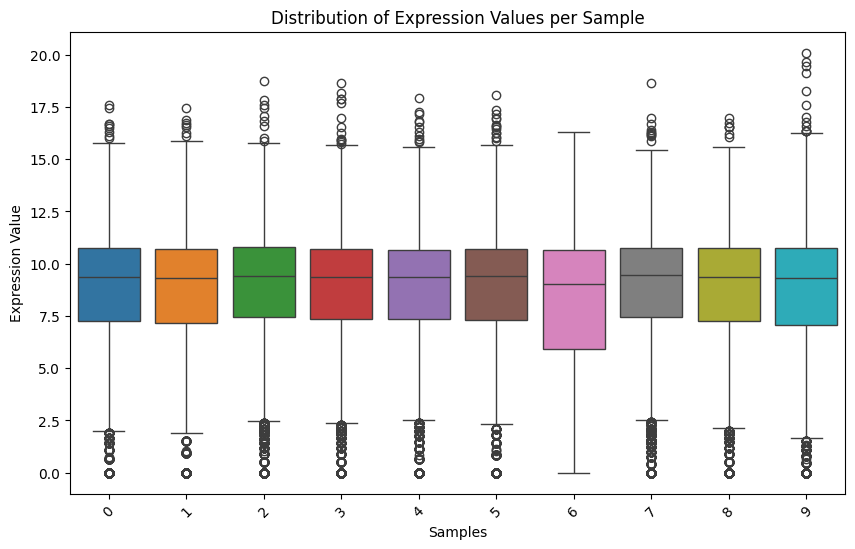

Mean:  RNF11     11.094129
ATRX      10.846221
PMM2      10.170162
ASS1      10.156604
NCBP1     10.118497
RBM14     10.150693
NCBP2     11.051578
SPR        9.920368
ZNF707     8.086999
CAMK4      3.778410
dtype: float64
Std:  RNF11     0.520740
ATRX      0.705381
PMM2      0.535017
ASS1      1.770231
NCBP1     0.477506
RBM14     0.298464
NCBP2     0.431496
SPR       0.843997
ZNF707    0.794116
CAMK4     1.278468
dtype: float64


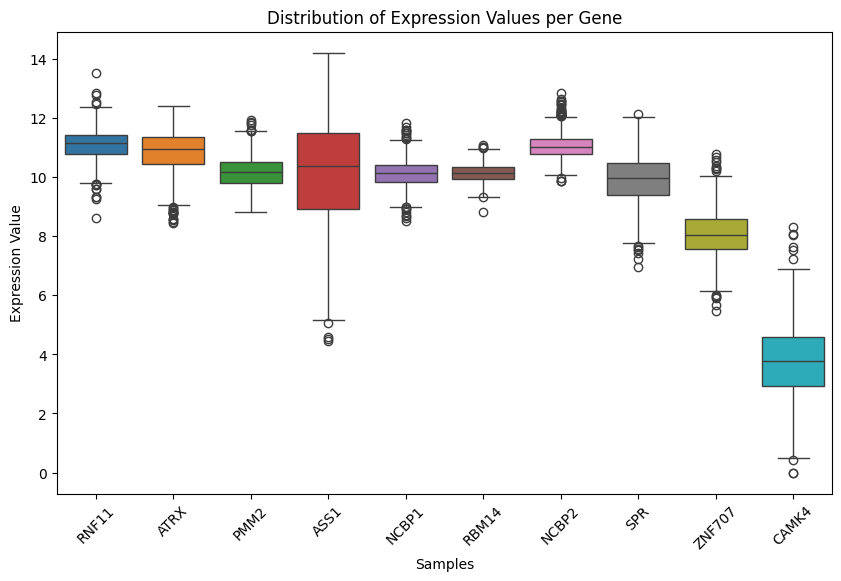

In [20]:
plot_box_per_sample(df_filt_final, df_filt_final)
plot_box_per_gene(df_filt_final, df_filt_final)

In [21]:
print(df_filt_final.shape)

(868, 4169)


In [22]:

df_filt_final.to_csv('data_csvs/rna/hallmarks/BRCA/rna_clean.csv')

# Make plots

In [19]:
#Boxplot per sample
def plot_box_per_sample(df_provided, df_downloaded):

    # # Transpose to have genes in rows and samples in columns
    # df_provided_per_sample = df_provided.head(10).T.drop("Unnamed: 0", axis=0)
    # # df_downloaded_per_sample = df_downloaded.head(5)
    # print(" FOR DATA THET PROVIDED")
    # print("Mean: ", df_provided_per_sample.mean(axis=0))
    # print("Std: ", df_provided_per_sample.std(axis=0))

    # plt.figure(figsize=(10, 6))
    # sns.boxplot(data=df_provided_per_sample)
    # plt.title("Distribution of Expression Values per Sample")
    # plt.xlabel("Samples")
    # plt.ylabel("Expression Value")
    # plt.xticks(rotation=45)
    # plt.show()

    # Transpose to have genes in rows and samples in columns
    df_downloaded_per_sample = df_downloaded.head(10).T.drop("Unnamed: 0", axis=0)
    # print(" FOR DATA THET PROVIDED")
    print("Mean: ", df_downloaded_per_sample.mean(axis=0))
    print("Std: ", df_downloaded_per_sample.std(axis=0))

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_downloaded_per_sample)
    plt.title("Distribution of Expression Values per Sample")
    plt.xlabel("Samples")
    plt.ylabel("Expression Value")
    plt.xticks(rotation=45)
    plt.show()


 FOR DATA THET PROVIDED
Mean:  0    3.419418
1     3.13974
2    3.394572
3    3.497681
4    3.360629
5    3.327292
6    2.750528
7    3.681816
8    3.188478
9    3.277951
dtype: object
Std:  0    3.860562
1    4.122467
2    3.822515
3    3.953443
4    3.899119
5    3.941358
6    4.546709
7    3.763517
8     3.90198
9    4.073219
dtype: object


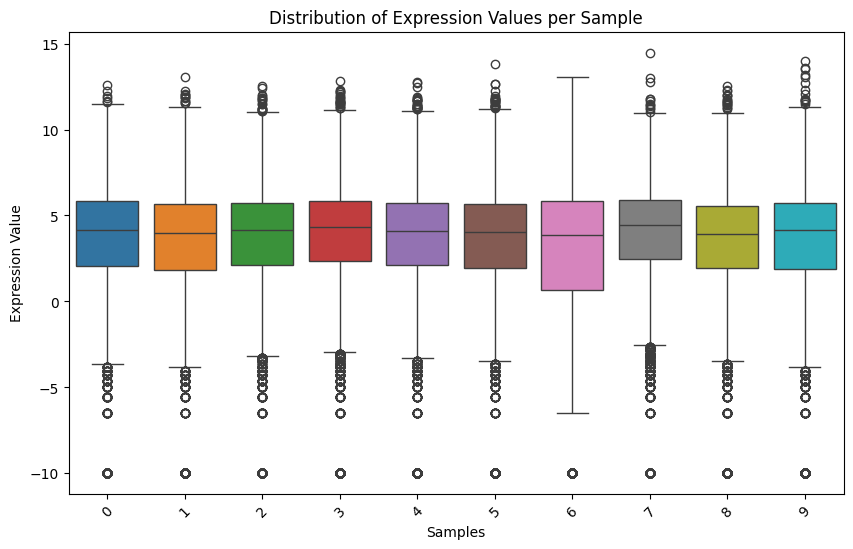

 FOR DATA THET PROVIDED
Mean:  0    0.125837
1    0.046171
2    0.232922
3    0.115797
4    0.149514
5     0.16185
6    -0.47705
7    0.224674
8    0.131631
9    0.049231
dtype: object
Std:  0    1.348099
1    1.427422
2    1.288671
3    1.294856
4    1.267936
5    1.242968
6    1.755523
7    1.314951
8    1.321862
9     1.45393
dtype: object


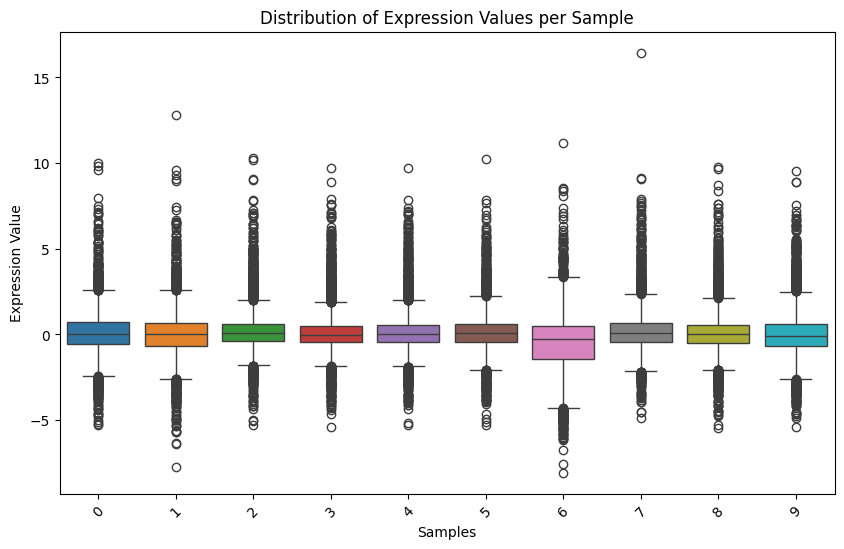

In [178]:
plot_box_per_sample(df_sorted_clean, df_filtered_complete)

In [18]:
#Boxplot per gene
def plot_box_per_gene(df_provided, df_downloaded):

    # Transpose to have genes in rows and samples in columns
    # df_provided_per_gene = df_provided.iloc[:, 1:11]
    df_downloaded_per_gene = df_downloaded.iloc[:, 1:11]

    # print(" FOR DATA THEY PROVIDED")
    # print("Mean: ", df_provided_per_gene.mean(axis=0))
    # print("Std: ", df_provided_per_gene.std(axis=0))

    # plt.figure(figsize=(10, 6))
    # sns.boxplot(data=df_provided_per_gene)
    # plt.title("Distribution of Expression Values per Gene")
    # plt.xlabel("Samples")
    # plt.ylabel("Expression Value")
    # plt.xticks(rotation=45)
    # plt.show()

    # print(" FOR DATA WE DOWNLOADED")
    print("Mean: ", df_downloaded_per_gene.mean(axis=0))
    print("Std: ", df_downloaded_per_gene.std(axis=0))

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_downloaded_per_gene)
    plt.title("Distribution of Expression Values per Gene")
    plt.xlabel("Samples")
    plt.ylabel("Expression Value")
    plt.xticks(rotation=45)
    plt.show()

 FOR DATA THEY PROVIDED
Mean:  A2M      7.258623
AAAS     4.986994
AADAT    0.656979
ABAT     3.314234
ABCA1    2.085021
ABCA2    4.457853
ABCA3    4.095337
ABCA4   -0.748647
ABCA5    2.413674
ABCA6    0.671078
dtype: float64
Std:  A2M      0.984553
AAAS     0.483372
AADAT    1.484896
ABAT     1.915605
ABCA1    1.035766
ABCA2    0.890297
ABCA3    1.194510
ABCA4    1.927521
ABCA5    1.069146
ABCA6    1.408745
dtype: float64


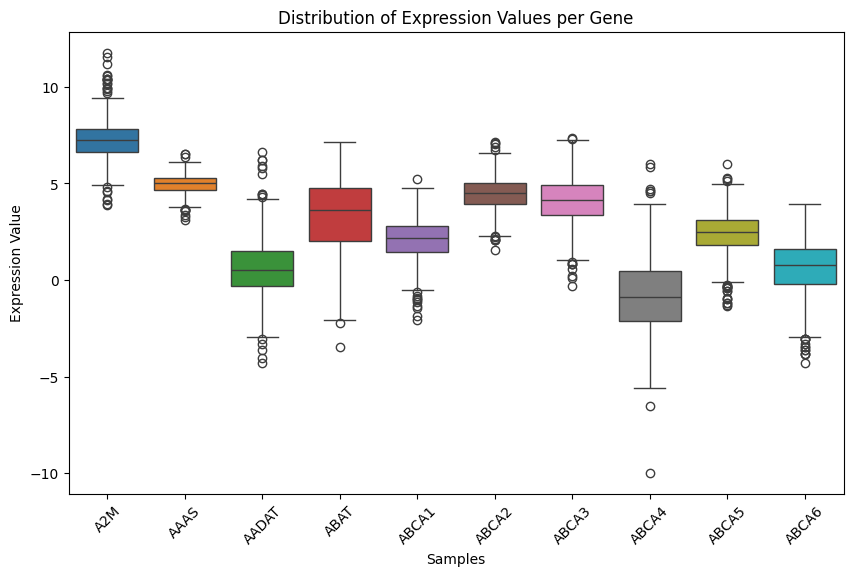

 FOR DATA WE DOWNLOADED
Mean:  A2M      0.131214
AAAS    -0.204888
AADAT   -0.974183
ABAT     0.271198
ABCA1   -0.415550
ABCA2   -0.238455
ABCA3    1.058884
ABCA4    1.001082
ABCA5   -0.218881
ABCA6    0.781923
dtype: float64
Std:  A2M      0.989006
AAAS     0.434396
AADAT    1.554207
ABAT     1.887141
ABCA1    0.902685
ABCA2    0.837631
ABCA3    1.118686
ABCA4    2.132157
ABCA5    1.144688
ABCA6    1.640457
dtype: float64


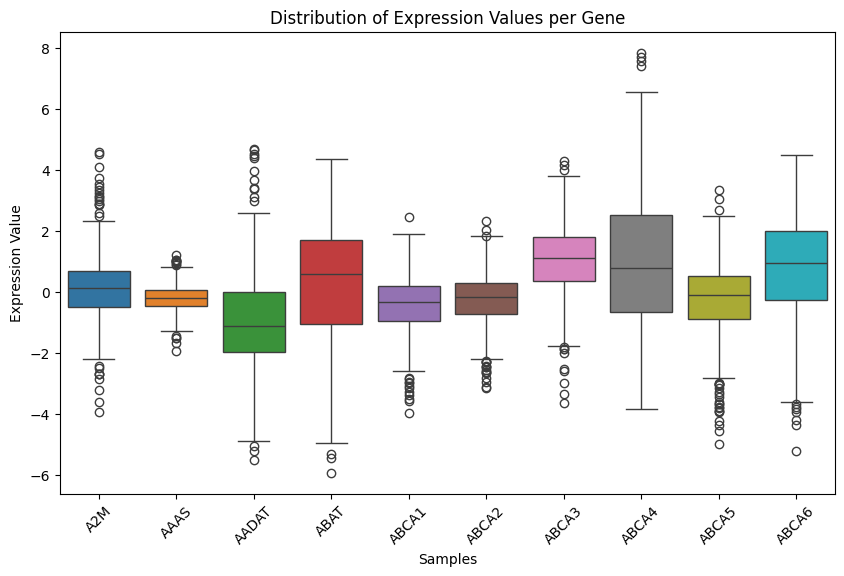

In [180]:
plot_box_per_gene(df_sorted_clean, df_filtered_complete)